In [1]:
import json
import requests
import pandas as pd

url = 'http://bayesian-bandit.adludio.com/'
r = requests.post(url +'dump_bandit_data', 
    json={'item_group_id_list': ['s2dmtni', 'wqgxoc1', 'uwyvrja'] } )
parsed = json.loads(r.content)
df = pd.DataFrame(parsed['bandit_data']).sort_values('date').reset_index(drop=True).drop(columns='id')
df

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue
0,ckpyp9j,s2dmtni,2020-08-03,2021-02-01 18:53:33,92,586,92,586,0,2.09,27.6
1,spijye8,s2dmtni,2020-08-03,2021-02-01 18:53:33,93,553,93,553,1,1.99,27.9
2,dyiyo3b,s2dmtni,2020-08-03,2021-02-01 18:53:33,42,271,42,271,0,1.03,12.6
3,spijye8,s2dmtni,2020-08-04,2021-02-01 18:53:33,526,5499,526,5499,2,22.15,157.8
4,dyiyo3b,s2dmtni,2020-08-04,2021-02-01 18:53:33,396,5191,396,5191,5,22.16,118.8
...,...,...,...,...,...,...,...,...,...,...,...
576,cbr81rt,uwyvrja,2020-11-15,2021-02-01 18:55:03,659,2815,659,2815,70,18.00,263.6
577,f755tsf,uwyvrja,2020-11-15,2021-02-01 18:55:02,765,3623,765,3623,71,24.00,306.0
578,158d2i4,uwyvrja,2020-11-15,2021-02-01 18:55:02,35,156,35,156,4,1.00,14.0
579,i4li3e7,uwyvrja,2020-11-15,2021-02-01 18:55:03,732,3446,732,3446,58,22.90,292.8


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            581 non-null    object 
 1   item_group_id      581 non-null    object 
 2   date               581 non-null    object 
 3   created_at         581 non-null    object 
 4   num_success        581 non-null    int64  
 5   num_trials         581 non-null    int64  
 6   num_engagements    581 non-null    int64  
 7   num_impressions    581 non-null    int64  
 8   num_clickthroughs  581 non-null    int64  
 9   daily_spend        581 non-null    float64
 10  revenue            581 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 50.1+ KB


In [10]:
#create new columns engagement_rate and click_through_rate
df['engagement_rate'] = df['num_engagements'] / df['num_impressions']
df['click_through_rate'] = df['num_clickthroughs'] / df['num_engagements']

In [11]:
df.columns

Index(['item_id', 'item_group_id', 'date', 'created_at', 'num_success',
       'num_trials', 'num_engagements', 'num_impressions', 'num_clickthroughs',
       'daily_spend', 'revenue', 'engagement_rate', 'click_through_rate'],
      dtype='object')

In [12]:
campaigns = df.groupby('item_group_id')

In [13]:
s2dmtni = campaigns.get_group('s2dmtni')
uwyvrja = campaigns.get_group('uwyvrja')
wqgxoc1 = campaigns.get_group('wqgxoc1')

In [14]:
adgroups_s2dmtni = s2dmtni.groupby('item_id')

In [16]:
list(adgroups_s2dmtni.groups)

['ckpyp9j', 'dyiyo3b', 'spijye8']

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Engagement Rates Time Evolution (ER)

#### The s2dmtni campaign

item_id
ckpyp9j    AxesSubplot(0.125,0.125;0.775x0.755)
dyiyo3b    AxesSubplot(0.125,0.125;0.775x0.755)
spijye8    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

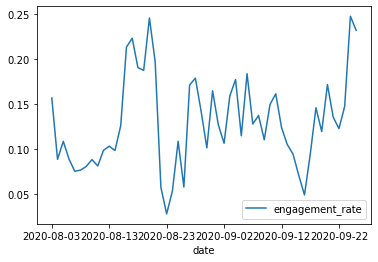

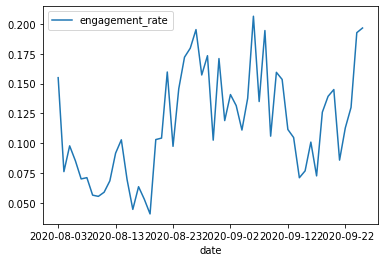

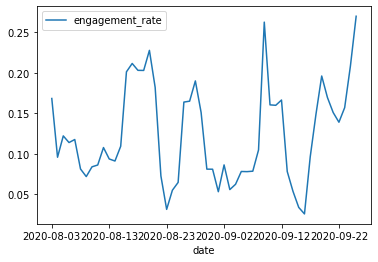

In [39]:
adgroups_s2dmtni.plot(x='date', y='engagement_rate')


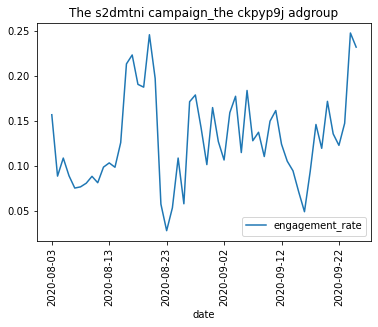

In [21]:
adgroups_s2dmtni_ckpyp9j = adgroups_s2dmtni.get_group('ckpyp9j')
adgroups_s2dmtni_ckpyp9j.plot(x='date', y='engagement_rate')
plt.title('The s2dmtni campaign_the ckpyp9j adgroup')
plt.xticks(rotation=90)
plt.show()

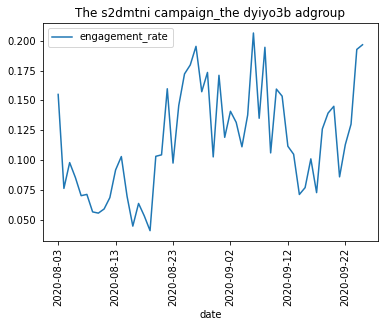

In [34]:
adgroups_s2dmtni_dyiyo3b = adgroups_s2dmtni.get_group('dyiyo3b')
adgroups_s2dmtni_dyiyo3b.plot(x='date', y='engagement_rate')
plt.title('The s2dmtni campaign_the dyiyo3b adgroup')
plt.xticks(rotation=90)
plt.show()

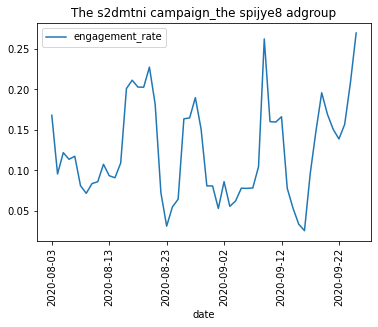

In [35]:
adgroups_s2dmtni_spijye8 = adgroups_s2dmtni.get_group('spijye8')
adgroups_s2dmtni_spijye8.plot(x='date', y='engagement_rate')
plt.title('The s2dmtni campaign_the spijye8 adgroup')
plt.xticks(rotation=90)
plt.show()

In [36]:
adgroups_uwyvrja = uwyvrja.groupby('item_id')
list(adgroups_uwyvrja.groups)

['158d2i4', '52nuiyr', 'cbr81rt', 'f755tsf', 'fbsam05', 'i4li3e7', 'pwix0yl']

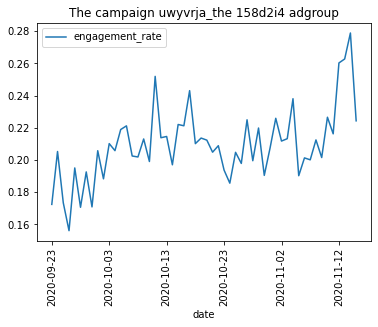

In [38]:
adgroups_uwyvrja_158d2i4 = adgroups_uwyvrja.get_group('158d2i4')
adgroups_uwyvrja_158d2i4.plot(x='date', y='engagement_rate')
plt.title('The campaign uwyvrja_the 158d2i4 adgroup')
plt.xticks(rotation=90)
plt.show()

In [ ]:
adgroups_uwyvrja_52nuiyr = adgroups_uwyvrja.get_group('52nuiyr')
adgroups_uwyvrja_52nuiyr.plot(x='date', y='engagement_rate')
plt.title('The campaign uwyvrja_the 52nuiyr adgroup')
plt.xticks(rotation=90)
plt.show()

In [ ]:
adgroups_uwyvrja_52nuiyr = adgroups_uwyvrja.get_group('52nuiyr')
adgroups_uwyvrja_52nuiyr.plot(x='date', y='engagement_rate')
plt.title('The campaign uwyvrja_the 52nuiyr adgroup')
plt.xticks(rotation=90)
plt.show()

In [ ]:
def time_plots(df, x_plot, y_plot, campaign, adgroup):
    df.plot(x=x_plot, y=y_plot)
    plt.title('The {} campaign_the {} adgroup'.format(campaign, adgroup))
    plt.xticks(rotation=90)
    plt.show()

In [30]:
def get_groups(df, col):
    group_by_df = df.groupby(col)
    return [group_by_df.get_group(x) for x in group_by_df.groups]



In [32]:
a, b, c = get_groups(df, 'item_group_id')


In [33]:
groups_within_a = get_groups(a, 'item_id')

,item_id,item_group_id,date,created_at,num_success,num_trials,num_engagements,num_impressions,num_clickthroughs,daily_spend,revenue,engagement_rate,click_through_rate
0,ckpyp9j,s2dmtni,2020-08-03,2021-02-01 18:53:33,92,586,92,586,0,2.09,27.6,0.156997,0.000000
1,spijye8,s2dmtni,2020-08-03,2021-02-01 18:53:33,93,553,93,553,1,1.99,27.9,0.168174,0.010753
2,dyiyo3b,s2dmtni,2020-08-03,2021-02-01 18:53:33,42,271,42,271,0,1.03,12.6,0.154982,0.000000
3,spijye8,s2dmtni,2020-08-04,2021-02-01 18:53:33,526,5499,526,5499,2,22.15,157.8,0.095654,0.003802
4,dyiyo3b,s2dmtni,2020-08-04,2021-02-01 18:53:33,396,5191,396,5191,5,22.16,118.8,0.076286,0.012626
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,ckpyp9j,s2dmtni,2020-09-24,2021-02-01 18:53:46,29,117,29,117,2,0.45,8.7,0.247863,0.068966
209,spijye8,s2dmtni,2020-09-24,2021-02-01 18:53:46,191,917,191,917,10,3.68,57.3,0.208288,0.052356
215,dyiyo3b,s2dmtni,2020-09-25,2021-02-01 18:53:46,23,117,23,117,1,0.47,6.9,0.196581,0.043478
221,spijye8,s2dmtni,2020-09-25,2021-02-01 18:53:46,219,812,219,812,17,3.26,65.7,0.269704,0.077626
